In [3]:
import arviz as az
import pymc3 as pm

from data import dataloader
from models.pymc3_models import Model

In [23]:
sne_data.describe()

,mag,redshift,stretch,color,host_mass
count,459.000000,459.000000,459.000000,459.000000,350.000000
mean,20.377365,0.220109,-0.028064,-0.021657,11.080313
std,2.050524,0.157430,1.000387,0.084437,1.259485
min,14.148421,0.010060,-2.862959,-0.250149,7.728832
25%,19.713976,0.123395,-0.707565,-0.080951,10.380646
50%,20.762042,0.196710,0.076743,-0.027909,11.112267
75%,21.536507,0.276470,0.747918,0.035180,11.849718
max,25.020075,0.970782,2.337170,0.259538,15.053078


In [4]:
df = dataloader.get_zpeg(1)
sne_data = df[["mag", "redshift", "stretch", "color", "host_mass"]]

model = Model(
    sne_data, hubble_constant=70, omega_m=0.3, host_mass_correction_model="step"
)

model

In [6]:
with model:
    trace = pm.sample(1000, chains=4, tune=1000)

/var/folders/dh/q65wqsbs3tn0993nc2j5dzy00000gn/T/ipykernel_18963/1314882913.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, chains=4, tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [size, loc, M, $\beta$, $\alpha$, $\sigma_{HR}$]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 189 seconds.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.4671264675602275, but should be close to 0.8. Try to increase the number of tuning steps.
There were 476 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 774 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 741 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not conver

/Users/keto/Projects/research_playground/hubble_constant_mass_correction/.venv/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'M'}>,
        <AxesSubplot:title={'center':'M'}>],
       [<AxesSubplot:title={'center':'loc'}>,
        <AxesSubplot:title={'center':'loc'}>],
       [<AxesSubplot:title={'center':'size'}>,
        <AxesSubplot:title={'center':'size'}>]], dtype=object)

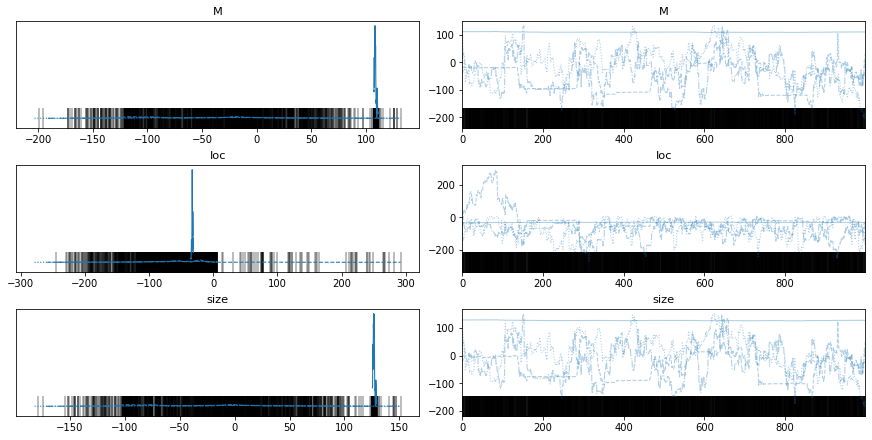

In [8]:
az.plot_trace(trace, var_names=['M', 'loc', 'size'])

## MCMC Results

## Unpooled Variable

Variables shared by all SN

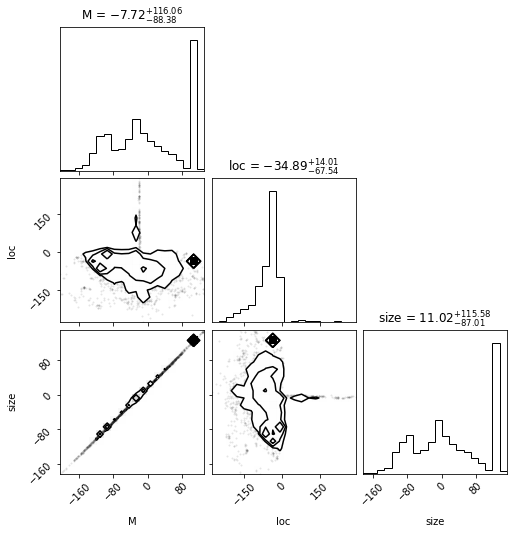

In [11]:
from corner import corner
import numpy as np 

labels = ['M', 'loc', 'size']
corner(np.vstack([trace[k].flatten() for k in labels]).T, labels=labels, show_titles=True);

### Pooled Variable

Variables related to a specific SN. Let's arbritrarily study oen

In [15]:
sn_idx = 0

labels = ['M', 'loc', 'size', r'$\Delta M$']
sn_trace = trace

corner(np.vstack([trace[k].flatten() for k in labels]).T, labels=labels, show_titles=True);

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4000 and the array at index 3 has size 1836000